## 基本包

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

## 中文显示

In [2]:
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False

## 忽略警告

In [3]:
import warnings
warnings.filterwarnings(action='ignore')

## 显示所有行列

In [4]:
#显示所有列
pd.set_option('display.max_columns',None)
#显示所有行
pd.set_option('display.max_rows',None)

## 读取数据

In [5]:
train_datas=pd.read_csv('./datas/happiness_train_complete.csv',sep=',',encoding='gb2312')
test_datas=pd.read_csv('./datas/happiness_test_complete.csv',sep=',',encoding='gb2312')

In [6]:
train_datas.shape

(8000, 140)

In [7]:
test_datas.shape

(2968, 139)

In [8]:
train_datas.head()

,id,happiness,survey_type,province,city,county,survey_time,gender,birth,nationality,religion,religion_freq,edu,edu_other,edu_status,edu_yr,income,political,join_party,floor_area,property_0,property_1,property_2,property_3,property_4,property_5,property_6,property_7,property_8,property_other,height_cm,weight_jin,health,health_problem,depression,hukou,hukou_loc,media_1,media_2,media_3,media_4,media_5,media_6,leisure_1,leisure_2,leisure_3,leisure_4,leisure_5,leisure_6,leisure_7,leisure_8,leisure_9,leisure_10,leisure_11,leisure_12,socialize,relax,learn,social_neighbor,social_friend,socia_outing,equity,class,class_10_before,class_10_after,class_14,work_exper,work_status,work_yr,work_type,work_manage,insur_1,insur_2,insur_3,insur_4,family_income,family_m,family_status,house,car,invest_0,invest_1,invest_2,invest_3,invest_4,invest_5,invest_6,invest_7,invest_8,invest_other,son,daughter,minor_child,marital,marital_1st,s_birth,marital_now,s_edu,s_political,s_hukou,s_income,s_work_exper,s_work_status,s_work_type,f_birth,f_edu,f_political,f_work_14,m_birth,m_edu,m_political,m_work_14,status_peer,status_3_before,view,inc_ability,inc_exp,trust_1,trust_2,trust_3,trust_4,trust_5,trust_6,trust_7,trust_8,trust_9,trust_10,trust_11,trust_12,trust_13,neighbor_familiarity,public_service_1,public_service_2,public_service_3,public_service_4,public_service_5,public_service_6,public_service_7,public_service_8,public_service_9
0,1,4,1,12,32,59,2015/8/4 14:18,1,1959,1,1,1,11,NaN,4.0,-2.0,20000,1,NaN,45.0,0,1,0,0,0,0,0,0,0,NaN,176,155,3,2,5,5,2.0,4,2,5,5,4,3,1,4,3,1,2,3,4,1,4,5,4,1,2,4,3,3.0,3.0,2,3,3,3,3,1,1,3.0,30.0,1.0,2.0,1,1,1,2,60000.0,2,2,1,2,0,1,0,0,0,0,0,0,0,NaN,1,0,0.0,3,1984.0,1958.0,1984.0,6.0,1.0,5.0,40000.0,5.0,NaN,NaN,-2,4,4,1,-2,4,1,1,3,2,4,3,50000.0,4,2,-8,-8,5,3,2,3,4,3,-8,4,1,4,50,60,50,50,30.0,30,50,50,50
1,2,4,2,18,52,85,2015/7/21 15:04,1,1992,1,1,1,12,NaN,4.0,2013.0,20000,1,NaN,110.0,0,0,0,0,1,0,0,0,0,NaN,170,110,5,4,3,1,1.0,2,2,1,3,5,1,2,3,4,3,5,4,3,2,3,4,5,1,2,4,3,6.0,2.0,1,3,6,4,8,5,1,3.0,2.0,1.0,3.0,1,1,1,1,40000.0,3,4,1,2,0,1,0,0,0,0,0,0,0,NaN,0,0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1972,3,1,2,1973,3,1,2,1,1,4,2,50000.0,5,4,4,3,5,3,3,3,2,3,3,3,2,3,90,70,70,80,85.0,70,90,60,60
2,3,4,2,29,83,126,2015/7/21 13:24,2,1967,1,0,3,4,NaN,4.0,-2.0,2000,1,NaN,120.0,0,1,1,0,0,0,0,0,0,NaN,160,122,4,4,5,1,1.0,2,2,2,5,1,3,1,4,4,3,5,4,4,2,3,5,5,5,3,4,2,2.0,5.0,2,4,5,4,6,3,2,NaN,NaN,NaN,NaN,1,1,2,2,8000.0,3,3,1,2,0,1,0,0,0,0,0,0,0,NaN,0,2,1.0,3,1990.0,1968.0,1990.0,3.0,1.0,1.0,6000.0,3.0,NaN,NaN,-2,1,1,2,-2,1,1,2,2,1,4,2,80000.0,3,3,3,3,4,3,3,3,3,3,-8,3,1,4,90,80,75,79,80.0,90,90,90,75
3,4,5,2,10,28,51,2015/7/25 17:33,2,1943,1,1,1,3,NaN,4.0,1959.0,6420,1,NaN,78.0,0,0,0,1,0,0,0,0,0,NaN,163,170,4,4,4,1,2.0,2,1,1,5,1,1,1,5,2,4,5,4,5,1,1,5,5,5,2,4,4,1.0,6.0,1,4,5,5,7,2,4,NaN,NaN,NaN,NaN,2,2,2,2,12000.0,3,3,1,1,0,1,0,0,0,0,0,0,0,NaN,1,4,0.0,7,1960.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2,14,1,2,-2,1,1,2,2,1,3,2,10000.0,3,3,4,3,5,3,3,5,4,3,3,3,2,3,100,90,70,80,80.0,90,90,80,80
4,5,4,1,7,18,36,2015/8/10 9:50,2,1994,1,1,1,12,NaN,1.0,2014.0,-1,2,NaN,70.0,0,0,0,0,1,0,0,0,0,NaN,165,110,5,5,3,2,3.0,1,3,4,2,5,5,3,3,3,2,4,4,3,5,2,5,5,1,4,3,4,7.0,5.0,3,2,1,1,1,4,6,NaN,NaN,NaN,NaN,1,2,2,2,-2.0,4,3,1,1,0,1,0,0,0,0,0,0,0,NaN,0,0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,6,1,10,1972,4,1,15,3,2,3,-8,200000.0,4,3,3,3,5,5,3,4,3,3,3,3,2,2,50,50,50,50,50.0,50,50,50,50


In [9]:
test_datas.head()#可以看出训练集比测试集多出了第二列happiness，即我们要预测的Y值

,id,survey_type,province,city,county,survey_time,gender,birth,nationality,religion,religion_freq,edu,edu_other,edu_status,edu_yr,income,political,join_party,floor_area,property_0,property_1,property_2,property_3,property_4,property_5,property_6,property_7,property_8,property_other,height_cm,weight_jin,health,health_problem,depression,hukou,hukou_loc,media_1,media_2,media_3,media_4,media_5,media_6,leisure_1,leisure_2,leisure_3,leisure_4,leisure_5,leisure_6,leisure_7,leisure_8,leisure_9,leisure_10,leisure_11,leisure_12,socialize,relax,learn,social_neighbor,social_friend,socia_outing,equity,class,class_10_before,class_10_after,class_14,work_exper,work_status,work_yr,work_type,work_manage,insur_1,insur_2,insur_3,insur_4,family_income,family_m,family_status,house,car,invest_0,invest_1,invest_2,invest_3,invest_4,invest_5,invest_6,invest_7,invest_8,invest_other,son,daughter,minor_child,marital,marital_1st,s_birth,marital_now,s_edu,s_political,s_hukou,s_income,s_work_exper,s_work_status,s_work_type,f_birth,f_edu,f_political,f_work_14,m_birth,m_edu,m_political,m_work_14,status_peer,status_3_before,view,inc_ability,inc_exp,trust_1,trust_2,trust_3,trust_4,trust_5,trust_6,trust_7,trust_8,trust_9,trust_10,trust_11,trust_12,trust_13,neighbor_familiarity,public_service_1,public_service_2,public_service_3,public_service_4,public_service_5,public_service_6,public_service_7,public_service_8,public_service_9
0,8001,1,2,2,9,2015/7/24 10:30,2,1972,8,0,1,4,NaN,2.0,1989.0,18000,1,NaN,100.0,0,1,1,0,0,0,0,0,0,NaN,155,120,4,4,4,4,1,2,2,1,4,3,2,1,4,2,4,4,3,3,3,3,5,1,3,3,3,2,1.0,3.0,1,2,5,5,5,4,1,5.0,12.0,2.0,3.0,1,1,2,2,-2,5,3,1,2,0,1,0,0,0,0,0,0,0,NaN,1,0,1.0,3,1998.0,1972.0,1998.0,4.0,1.0,1.0,18000.0,1.0,5.0,2.0,1935,3,1,13,1936,3,1,13,3,1,4,2,30000.0,4,4,4,4,4,4,3,4,3,3,-8,3,2,4,80,80.0,60,80,80,80,80,80,80
1,8002,1,22,66,106,2015/7/12 15:38,2,1938,1,1,1,4,NaN,4.0,-2.0,20000,1,NaN,50.0,0,1,0,1,0,0,0,0,0,NaN,150,75,1,1,2,5,1,1,1,3,5,1,1,1,5,5,5,5,2,1,4,5,5,5,5,5,4,1,1.0,1.0,1,3,3,5,-8,4,5,NaN,NaN,NaN,NaN,1,1,2,2,20000,1,1,2,2,0,1,0,0,0,0,0,0,0,NaN,3,0,0.0,7,1959.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2,1,1,2,-2,1,1,2,3,3,4,2,50000.0,3,3,3,3,4,2,2,4,4,4,4,4,4,5,90,80.0,80,80,80,80,70,80,80
2,8003,2,9,22,44,2015/7/5 9:36,2,1935,1,1,1,1,NaN,NaN,NaN,500,1,NaN,60.0,0,0,0,1,0,0,0,0,0,NaN,155,85,4,2,2,1,1,1,1,1,1,1,1,5,5,4,5,5,4,5,5,5,5,5,5,2,3,1,2.0,6.0,1,4,1,1,1,2,4,NaN,NaN,NaN,NaN,1,1,2,2,-2,1,2,1,2,0,1,0,0,0,0,0,0,0,NaN,2,3,0.0,7,1954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2,1,1,2,1914,1,1,2,3,1,3,4,2000.0,5,5,4,4,4,3,3,3,4,4,4,2,2,5,95,95.0,80,90,80,95,95,80,90
3,8004,2,18,52,86,2015/7/19 10:10,2,1992,1,1,1,4,NaN,2.0,-1.0,50000,1,NaN,220.0,0,0,1,0,0,0,0,0,0,NaN,160,126,5,5,5,1,1,2,2,1,5,4,1,1,5,4,4,5,3,4,4,3,3,3,3,2,2,2,1.0,1.0,1,4,5,4,6,5,5,NaN,NaN,NaN,NaN,2,2,2,2,100000,2,4,1,2,0,1,0,0,0,0,0,0,0,NaN,1,0,1.0,3,2014.0,1991.0,2014.0,4.0,1.0,1.0,50000.0,1.0,3.0,1.0,1967,4,1,2,1966,1,1,2,2,1,3,2,80000.0,4,4,3,3,4,3,3,3,3,3,3,3,3,4,80,80.0,70,90,80,80,70,60,50
4,8005,2,24,70,110,2015/8/3 11:41,1,1990,1,1,2,1,NaN,NaN,NaN,0,1,NaN,200.0,1,0,0,0,0,0,0,0,0,NaN,173,130,4,5,3,4,1,1,1,1,4,4,1,2,3,4,4,5,4,2,5,3,5,5,1,4,4,2,1.0,4.0,6,2,2,4,6,1,2,NaN,NaN,NaN,NaN,1,1,2,2,30000,3,2,1,2,0,1,0,0,0,0,0,0,0,NaN,0,0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1964,3,1,2,-2,-8,-8,-8,2,2,5,2,-2.0,4,3,4,4,5,4,3,-8,4,3,4,5,1,-8,60,50.0,0,30,40,50,60,-2,60


## 提取标签X,Y

In [10]:
print(train_datas['happiness'].value_counts())

 4    4818
 5    1410
 3    1159
 2     497
 1     104
-8      12
Name: happiness, dtype: int64


In [11]:
train_datas['happiness'] = train_datas['happiness'].replace(-8, 3)
print(train_datas['happiness'].value_counts())

4    4818
5    1410
3    1171
2     497
1     104
Name: happiness, dtype: int64


In [12]:
train_datas_Y=train_datas[['happiness']]
train_datas_X=train_datas.drop(["happiness"],axis=1)
train_datas_X.shape
#train_datas_X.head()

(8000, 139)

In [13]:
train_datas_Y.head()

,happiness
0,4
1,4
2,4
3,5
4,4


In [14]:
train_datas_Y.isnull().sum()

happiness    0
dtype: int64

In [15]:
#训练集测试集数据一起处理,两个都是139列相同标签
all_datas=pd.concat((train_datas_X,test_datas))
all_datas.shape

(10968, 139)

In [16]:
all_datas.head()

,id,survey_type,province,city,county,survey_time,gender,birth,nationality,religion,religion_freq,edu,edu_other,edu_status,edu_yr,income,political,join_party,floor_area,property_0,property_1,property_2,property_3,property_4,property_5,property_6,property_7,property_8,property_other,height_cm,weight_jin,health,health_problem,depression,hukou,hukou_loc,media_1,media_2,media_3,media_4,media_5,media_6,leisure_1,leisure_2,leisure_3,leisure_4,leisure_5,leisure_6,leisure_7,leisure_8,leisure_9,leisure_10,leisure_11,leisure_12,socialize,relax,learn,social_neighbor,social_friend,socia_outing,equity,class,class_10_before,class_10_after,class_14,work_exper,work_status,work_yr,work_type,work_manage,insur_1,insur_2,insur_3,insur_4,family_income,family_m,family_status,house,car,invest_0,invest_1,invest_2,invest_3,invest_4,invest_5,invest_6,invest_7,invest_8,invest_other,son,daughter,minor_child,marital,marital_1st,s_birth,marital_now,s_edu,s_political,s_hukou,s_income,s_work_exper,s_work_status,s_work_type,f_birth,f_edu,f_political,f_work_14,m_birth,m_edu,m_political,m_work_14,status_peer,status_3_before,view,inc_ability,inc_exp,trust_1,trust_2,trust_3,trust_4,trust_5,trust_6,trust_7,trust_8,trust_9,trust_10,trust_11,trust_12,trust_13,neighbor_familiarity,public_service_1,public_service_2,public_service_3,public_service_4,public_service_5,public_service_6,public_service_7,public_service_8,public_service_9
0,1,1,12,32,59,2015/8/4 14:18,1,1959,1,1,1,11,NaN,4.0,-2.0,20000,1,NaN,45.0,0,1,0,0,0,0,0,0,0,NaN,176,155,3,2,5,5,2.0,4,2,5,5,4,3,1,4,3,1,2,3,4,1,4,5,4,1,2,4,3,3.0,3.0,2,3,3,3,3,1,1,3.0,30.0,1.0,2.0,1,1,1,2,60000.0,2,2,1,2,0,1,0,0,0,0,0,0,0,NaN,1,0,0.0,3,1984.0,1958.0,1984.0,6.0,1.0,5.0,40000.0,5.0,NaN,NaN,-2,4,4,1,-2,4,1,1,3,2,4,3,50000.0,4,2,-8,-8,5,3,2,3,4,3,-8,4,1,4,50,60.0,50,50,30.0,30,50,50,50
1,2,2,18,52,85,2015/7/21 15:04,1,1992,1,1,1,12,NaN,4.0,2013.0,20000,1,NaN,110.0,0,0,0,0,1,0,0,0,0,NaN,170,110,5,4,3,1,1.0,2,2,1,3,5,1,2,3,4,3,5,4,3,2,3,4,5,1,2,4,3,6.0,2.0,1,3,6,4,8,5,1,3.0,2.0,1.0,3.0,1,1,1,1,40000.0,3,4,1,2,0,1,0,0,0,0,0,0,0,NaN,0,0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1972,3,1,2,1973,3,1,2,1,1,4,2,50000.0,5,4,4,3,5,3,3,3,2,3,3,3,2,3,90,70.0,70,80,85.0,70,90,60,60
2,3,2,29,83,126,2015/7/21 13:24,2,1967,1,0,3,4,NaN,4.0,-2.0,2000,1,NaN,120.0,0,1,1,0,0,0,0,0,0,NaN,160,122,4,4,5,1,1.0,2,2,2,5,1,3,1,4,4,3,5,4,4,2,3,5,5,5,3,4,2,2.0,5.0,2,4,5,4,6,3,2,NaN,NaN,NaN,NaN,1,1,2,2,8000.0,3,3,1,2,0,1,0,0,0,0,0,0,0,NaN,0,2,1.0,3,1990.0,1968.0,1990.0,3.0,1.0,1.0,6000.0,3.0,NaN,NaN,-2,1,1,2,-2,1,1,2,2,1,4,2,80000.0,3,3,3,3,4,3,3,3,3,3,-8,3,1,4,90,80.0,75,79,80.0,90,90,90,75
3,4,2,10,28,51,2015/7/25 17:33,2,1943,1,1,1,3,NaN,4.0,1959.0,6420,1,NaN,78.0,0,0,0,1,0,0,0,0,0,NaN,163,170,4,4,4,1,2.0,2,1,1,5,1,1,1,5,2,4,5,4,5,1,1,5,5,5,2,4,4,1.0,6.0,1,4,5,5,7,2,4,NaN,NaN,NaN,NaN,2,2,2,2,12000.0,3,3,1,1,0,1,0,0,0,0,0,0,0,NaN,1,4,0.0,7,1960.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2,14,1,2,-2,1,1,2,2,1,3,2,10000.0,3,3,4,3,5,3,3,5,4,3,3,3,2,3,100,90.0,70,80,80.0,90,90,80,80
4,5,1,7,18,36,2015/8/10 9:50,2,1994,1,1,1,12,NaN,1.0,2014.0,-1,2,NaN,70.0,0,0,0,0,1,0,0,0,0,NaN,165,110,5,5,3,2,3.0,1,3,4,2,5,5,3,3,3,2,4,4,3,5,2,5,5,1,4,3,4,7.0,5.0,3,2,1,1,1,4,6,NaN,NaN,NaN,NaN,1,2,2,2,-2.0,4,3,1,1,0,1,0,0,0,0,0,0,0,NaN,0,0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,6,1,10,1972,4,1,15,3,2,3,-8,200000.0,4,3,3,3,5,5,3,4,3,3,3,3,2,2,50,50.0,50,50,50.0,50,50,50,50


# 数据预处理

In [17]:
#数据处理的思路：
   # 1.时间特征提取
   # 2.连续数据分段处理---转换为离散数据
   # 3.文本数据的提取，oneHOT,TF-IDF,词向量（文本向量法）
   # 4.对连续型的数据进行缺失值填充，一般可以填充为0，均值，众数，中位数，经验数据
    #5.对离散型数据进行缺失值填充，哑编码

In [18]:
#去掉id列
#all_datas=all_datas.drop(['id'],axis=1,inplace=False)#默认为False,新的数据不改变原数据，原数据Ture会删除原数据的id列
#all_datas.head()

In [19]:
#df_train=all_datas.iloc[:train_datas_X.shape[0]]
#df_train.shape

In [20]:
#统计缺失值前对异常值作处理，这里处理成Nan,-1 = 不适用; -2 = 不知道; -3 = 拒绝回答; -8 = 无法回答;
all_datas=all_datas.replace([-1,-2,-3,-8],np.nan)
all_datas.shape

(10968, 139)

In [21]:
all_datas['survey_time'] = pd.to_datetime(all_datas['survey_time'])#将调查时间数据转化为标准格式
import datetime as dt
all_datas['survey_time'] = all_datas['survey_time'].dt.year#提取调查年份
#添加年龄特征
all_datas['age']=all_datas['survey_time']-all_datas['birth']

all_datas['age'].head()

0    56
1    23
2    48
3    72
4    21
Name: age, dtype: int64

In [22]:
all_datas=all_datas.drop(['survey_time'],axis=1,inplace=False)
all_datas=all_datas.drop(['birth'],axis=1,inplace=False)

In [23]:
#统计缺失值
all_datas.isnull().sum()

id                          0
survey_type                 0
province                    0
city                        0
county                      0
gender                      0
nationality                20
religion                  146
religion_freq              22
edu                        19
edu_other               10962
edu_status               1607
edu_yr                   4435
income                    605
political                  47
join_party               9962
floor_area                  0
property_0                  0
property_1                  0
property_2                  0
property_3                  0
property_4                  0
property_5                  0
property_6                  0
property_7                  0
property_8                  0
property_other          10879
height_cm                   0
weight_jin                  0
health                      7
health_problem             52
depression                 26
hukou                       0
hukou_loc 

In [24]:
nan_num=all_datas.isnull().sum()
nan_num0_list=list(nan_num[nan_num==0].index)
#nan_num0_list

In [25]:
nan_numk_list=list(nan_num[nan_num>=9000].index)
nan_numk_list

['edu_other', 'join_party', 'property_other', 'invest_other']

In [26]:
all_datas=all_datas.drop(nan_numk_list,axis=1,inplace=False)
all_datas.shape

(10968, 134)

In [27]:
#删除survey_time,也可以对数据进行时间提取，年份，时间段（没有缺失值）
#all_datas=all_datas.drop(['survey_time'],axis=1,inplace=False)
#all_datas.shape

In [28]:
#all_datas.info(verbose=True,null_counts=True)

### 处理缺失不严重的值

In [29]:
nan_num02k_list=list(nan_num[(nan_num>0)&(nan_num<=9000)].index)
#nan_num02k_list

In [30]:
list01=[]
list02=[]
for column in nan_num02k_list:
    #print(all_datas[column].value_counts(dropna=False).shape[0])
    if all_datas[column].value_counts(dropna=False).shape[0]<=40:
        list01.append(column)
    else:
        list02.append(column)
print('list01:\n',list01)
print('------------------')
print('list02:\n',list02)

list01:
 ['nationality', 'religion', 'religion_freq', 'edu', 'edu_status', 'political', 'health', 'health_problem', 'depression', 'hukou_loc', 'media_1', 'media_2', 'media_3', 'media_4', 'media_5', 'media_6', 'leisure_1', 'leisure_2', 'leisure_3', 'leisure_4', 'leisure_5', 'leisure_6', 'leisure_7', 'leisure_8', 'leisure_9', 'leisure_10', 'leisure_11', 'leisure_12', 'socialize', 'relax', 'learn', 'social_neighbor', 'social_friend', 'socia_outing', 'equity', 'class', 'class_10_before', 'class_10_after', 'class_14', 'work_status', 'work_type', 'work_manage', 'insur_1', 'insur_2', 'insur_3', 'insur_4', 'family_m', 'family_status', 'house', 'car', 'son', 'daughter', 'minor_child', 's_edu', 's_political', 's_hukou', 's_work_exper', 's_work_status', 's_work_type', 'f_edu', 'f_political', 'f_work_14', 'm_edu', 'm_political', 'm_work_14', 'status_peer', 'status_3_before', 'view', 'inc_ability', 'trust_1', 'trust_2', 'trust_3', 'trust_4', 'trust_5', 'trust_6', 'trust_7', 'trust_8', 'trust_9', 't

In [31]:
#查看每个字段所取值的这个数目，来初步判断离散型还是连续型，离散的一般是分类比较少
#查看字段分别对离散的字段和连续的字段做填充处理
#4、对连续型的数据进行缺失值的填充 一般可以填充为0，均值，众数，中位数，经验数据
#5、对离散数据进行缺失值的填充 (缺失值单独作为一个类别，根据标签类别数量进行填充，经验数据) 哑编码

### list02连续值处理

In [32]:
#all_datas['edu_yr'].isnull().sum()
#all_datas['edu_yr'].value_counts(dropna=False)#最高教育获得年份，考虑分段,缺失值4435，可以分为上学，未上学

#分段
def edu_yr_split(x):
    if x>0:
        return 1
    else:
        return 0
    pass
all_datas['edu_yr_s']=all_datas['edu_yr'].map(edu_yr_split)
all_datas['edu_yr_s'].value_counts(dropna=False)#可以看出不知道时间的缺失值有8=4435个，

In [33]:
all_datas=all_datas.drop(['edu_yr'],axis=1,inplace=False)#直接删除

all_datas['work_yr'].value_counts(dropna=False)#缺失值7148，太多，暂分为两类，0-1
def work_yr_split(x):
    if x>0:
        return 1
    else:
        return 0
    pass
all_datas['work_yr_s']=all_datas['work_yr'].map(work_yr_split)
all_datas['work_yr_s'].value_counts(dropna=False)

In [34]:
all_datas=all_datas.drop(['work_yr'],axis=1,inplace=False)

all_datas['marital_1st'].value_counts(dropna=False)#您第一次结婚的时间,缺失值1901，可以考虑是未婚，可以考虑年龄
def marital_1st_split(x):
    if x>0:
        return 1
    else:
        return 0
    pass
all_datas['marital_1st_s']=all_datas['marital_1st'].map(marital_1st_split)
all_datas['marital_1st_s'].value_counts(dropna=False)

In [35]:
all_datas=all_datas.drop(['marital_1st'],axis=1,inplace=False)

In [36]:
#'f_birth', 'm_birth'可以算年龄，可以分段，缺失值都是四千多，约一半，可能是不知道，这里删除

In [37]:
all_datas=all_datas.drop(['s_birth','f_birth','m_birth'],axis=1,inplace=False)#直接删除能降低MSE

In [38]:
all_datas['marital_now'].value_counts()#您与目前的配偶是哪一年结婚的NAN=2938,改为结婚多少年了，补充0
all_datas['marital_now'].fillna(2015,inplace=True) 
#新增特征值mar_yr
all_datas['mar_yr']=2015-all_datas['marital_now']
all_datas=all_datas.drop(['marital_now'],axis=1,inplace=False)

In [39]:
#'s_income'缺失3063可以考虑删除，或者均值，或者01
all_datas=all_datas.drop(['s_income','inc_exp'],axis=1,inplace=False)

In [40]:
#以下连续型数据可以填充为均值或最值，这次先均值
for col in ('income','family_income','public_service_1', 'public_service_2', 'public_service_3', 'public_service_4', 'public_service_5', 'public_service_6', 'public_service_7', 'public_service_8', 'public_service_9'):
    all_datas[col]=all_datas[col].fillna(np.mean(all_datas[col]))

# todo:'income'，'inc_exp' 做一个字段：收入是否达到期望收入
#判断一下收入是否符合预期
def if_exp_inc(x):
    income, inc_exp = x[0],x[1]
    if income>=inc_exp:
        return 1
    else:
        return 0
all_datas['if_exp_inc'] = all_datas[['income','inc_exp']].apply(if_exp_inc,axis=1)

In [41]:
#公共服务打分可以求和放到一起
i=1
all_datas["public_service"]=0#新增一列栏目为total["public_service"],并将初始值设置为0，用以存储对所有public_service1-9系列的值
while i<10:                                                                                                                                                                                                                                                                                                                                                                                                                                                
    all_datas["public_service"]=all_datas["public_service"]+all_datas["public_service_"+str(i)]#将所有的值public_service1-9系列的值加起来
    all_datas=all_datas.drop(["public_service_"+str(i)],axis=1)#drop删除行或者列 axis=1时删除列，=0时删除行 加完值后便将public_service1-9列删除
    i=i+1


In [42]:
#在不直接涉及金钱利益的一般社会交往/接触中的信任度，可以求和放到一个里面
i=1
all_datas["trust"]=0
while i<14:
    all_datas["trust"]=all_datas["trust"]+all_datas["trust_"+str(i)]
    all_datas=all_datas.drop(["trust_"+str(i)],axis=1)
    i+=1

### list01离散值

In [43]:
all_datas.fillna(-1,inplace=True)#全部把缺失值单独分类

#您家目前是否从事以下投资活动-股票2-8
i=2
all_datas["invest"]=0
while i<9:
    all_datas["invest"]=all_datas["invest"]+all_datas["invest_"+str(i)]
    all_datas=all_datas.drop(["invest_"+str(i)],axis=1)
    i+=1

#过去一年，您是否常在空闲时间从事以下活动-看电视或看碟
i=1
all_datas["leisure"]=0
while i<13:
    all_datas["leisure"]=all_datas["leisure"]+all_datas["leisure_"+str(i)]
    all_datas=all_datas.drop(["leisure_"+str(i)],axis=1)
    i+=1

#过去一年，您对以下媒体的使用情况-杂志1-6
i=1
all_datas["media"]=0
while i<7:
    all_datas["media"]=all_datas["media"]+all_datas["media_"+str(i)]
    all_datas=all_datas.drop(["media_"+str(i)],axis=1)
    i+=1

for col in all_datas:
    all_datas[col]=all_datas[col].fillna(all_datas[col].mode()[0])#填充众数

In [44]:
#最后再来验证一下处理结果
total = all_datas.isnull().sum().sort_values(ascending=False)
percent = (all_datas.isnull().sum()/all_datas.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['total', 'percent'])
missing_data[missing_data['percent']>0]
missing_data

,total,percent
trust,0,0.0
health_problem,0,0.0
hukou,0,0.0
hukou_loc,0,0.0
media_1,0,0.0
media_2,0,0.0
media_3,0,0.0
media_4,0,0.0
media_5,0,0.0
media_6,0,0.0


In [45]:
#all_datas.info(verbose=True,null_counts=True)

## 特征工程

### 标准化

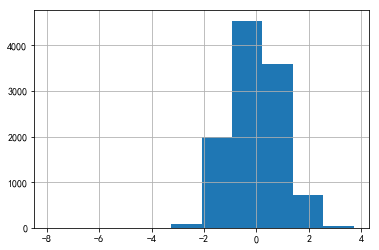

In [46]:
numeric_cols=['income','height_cm','weight_jin',
              'family_income','family_m','house','car'
              ,'son','daughter','minor_child','public_service','floor_area']#'s_income'删除
numeric_cols_means=all_datas.loc[:,numeric_cols].mean()
numeric_cols_std=all_datas.loc[:,numeric_cols].std()
df_numeric=(all_datas.loc[:,numeric_cols]-numeric_cols_means)/numeric_cols_std
df_numeric.iloc[:,1].hist()

In [47]:
#对类别类型的特征值转换为Object
df_object=all_datas.drop(numeric_cols,axis=1)
df_object=df_object.astype(str)
for cols in list(df_object.iloc[:,1:].columns):
    df_object=pd.get_dummies(df_object.iloc[:,1:],prefix=cols)#pandas提供对one-hot编码的函数是：pd.get_dummies()

In [48]:
#合并数据 
data=pd.concat((df_object,df_numeric),axis=1)

In [49]:
data.shape

(10968, 889)

In [50]:
#train_datas_Y=train_datas[['happiness']]
#train_datas_X=train_datas.drop(["happiness"],axis=1)
#train_datas_X.shape
#train_datas_X.head()

## 算法模型选择与评估

In [51]:
train_process_data_X=data.iloc[:train_datas_X.shape[0],:]
test_process_datas=data.iloc[train_datas_X.shape[0]:,:]


In [52]:
#train_process_data_X.head()

In [53]:
train_process_data_X.shape

(8000, 889)

In [54]:
test_process_data_X.shape

(2968, 889)

In [55]:
train_process_data_X.head()

,survey_type_69,survey_type_7,survey_type_70,survey_type_71,survey_type_72,survey_type_74,survey_type_75,survey_type_76,survey_type_77,survey_type_78,survey_type_79,survey_type_8,survey_type_80,survey_type_81,survey_type_82,survey_type_83,survey_type_84,survey_type_85,survey_type_86,survey_type_87,survey_type_88,survey_type_89,survey_type_9,survey_type_1,survey_type_10,survey_type_100,survey_type_101,survey_type_102,survey_type_103,survey_type_104,survey_type_105,survey_type_106,survey_type_107,survey_type_108,survey_type_109,survey_type_11,survey_type_110,survey_type_111,survey_type_112,survey_type_114,survey_type_115,survey_type_116,survey_type_117,survey_type_118,survey_type_119,survey_type_12,survey_type_120,survey_type_121,survey_type_122,survey_type_123,survey_type_124,survey_type_125,survey_type_126,survey_type_127,survey_type_128,survey_type_129,survey_type_13,survey_type_130,survey_type_131,survey_type_132,survey_type_133,survey_type_134,survey_type_14,survey_type_15,survey_type_16,survey_type_17,survey_type_18,survey_type_19,survey_type_2,survey_type_20,survey_type_21,survey_type_22,survey_type_23,survey_type_24,survey_type_25,survey_type_26,survey_type_27,survey_type_28,survey_type_29,survey_type_3,survey_type_30,survey_type_31,survey_type_32,survey_type_33,survey_type_34,survey_type_35,survey_type_36,survey_type_37,survey_type_38,survey_type_39,survey_type_4,survey_type_40,survey_type_41,survey_type_42,survey_type_43,survey_type_44,survey_type_45,survey_type_46,survey_type_47,survey_type_48,survey_type_49,survey_type_5,survey_type_50,survey_type_51,survey_type_52,survey_type_53,survey_type_54,survey_type_55,survey_type_56,survey_type_57,survey_type_58,survey_type_59,survey_type_6,survey_type_60,survey_type_61,survey_type_62,survey_type_63,survey_type_64,survey_type_65,survey_type_66,survey_type_67,survey_type_68,survey_type_7,survey_type_70,survey_type_71,survey_type_72,survey_type_73,survey_type_74,survey_type_75,survey_type_76,survey_type_77,survey_type_78,survey_type_79,survey_type_8,survey_type_80,survey_type_81,survey_type_82,survey_type_83,survey_type_84,survey_type_85,survey_type_86,survey_type_87,survey_type_88,survey_type_89,survey_type_9,survey_type_90,survey_type_91,survey_type_92,survey_type_93,survey_type_95,survey_type_97,survey_type_98,survey_type_99,survey_type_1,survey_type_2,survey_type_-1.0,survey_type_1.0,survey_type_2.0,survey_type_3.0,survey_type_4.0,survey_type_5.0,survey_type_6.0,survey_type_7.0,survey_type_8.0,survey_type_-1.0,survey_type_0.0,survey_type_1.0,survey_type_-1.0,survey_type_1.0,survey_type_2.0,survey_type_3.0,survey_type_4.0,survey_type_5.0,survey_type_6.0,survey_type_7.0,survey_type_8.0,survey_type_9.0,survey_type_-1.0,survey_type_1.0,survey_type_10.0,survey_type_11.0,survey_type_12.0,survey_type_13.0,survey_type_14.0,survey_type_2.0,survey_type_3.0,survey_type_4.0,survey_type_5.0,survey_type_6.0,survey_type_7.0,survey_type_8.0,survey_type_9.0,survey_type_-1.0,survey_type_1.0,survey_type_2.0,survey_type_3.0,survey_type_4.0,survey_type_-1.0,survey_type_1.0,survey_type_2.0,survey_type_3.0,survey_type_4.0,survey_type_0,survey_type_1,survey_type_0,survey_type_1,survey_type_0,survey_type_1,survey_type_0,survey_type_1,survey_type_0,survey_type_1,survey_type_0,survey_type_1,survey_type_0,survey_type_1,survey_type_0,survey_type_1,survey_type_0,survey_type_1,survey_type_-1.0,survey_type_1.0,survey_type_2.0,survey_type_3.0,survey_type_4.0,survey_type_5.0,survey_type_-1.0,survey_type_1.0,survey_type_2.0,survey_type_3.0,survey_type_4.0,survey_type_5.0,survey_type_-1.0,survey_type_1.0,survey_type_2.0,survey_type_3.0,survey_type_4.0,survey_type_5.0,survey_type_1,survey_type_2,survey_type_3,survey_type_4,survey_type_5,survey_type_6,survey_type_7,survey_type_8,survey_type_-1.0,survey_type_1.0,survey_type_2.0,survey_type_3.0,survey_type_4.0,survey_type_-1.0,survey_type_1.0,survey_type_2.0,survey_type_3.0,survey_type_4.0,survey_type_5.0,survey_type_-1.0,survey_type_1.0,survey_type_2.0,survey_ty

In [56]:
train_datas_Y.shape

(8000, 1)

## 保存为CSV格式

In [1]:
import os
dir_path='./process_datas'
if os.path.exists(dir_path):
    pass
else:
    os.makedirs(dir_path)

In [ ]:
train_process_datas_X.to_csv(dir_path+'./train_process_datas_X.csv',index=False)
test_process_datas.to_csv(dir_path+'./test_process_datas.csv',index=False)
train_datas_Y.to_csv(dir_path+'./train_datas_Y.csv',index=False)

In [ ]:
train_process_datas_X.to_csv